<img src='../img/EU-Copernicus-EUM_3Logos.png' alt='Logo EU Copernicus EUMETSAT' align='right' width='50%'></img>

<b>

<a href="../00_index.ipynb"><< Index</a><br>
<a href="./333_Sentinel-3_SLSTR_NRT_AOD_Californian_fires_case_study.ipynb"><< 333 - Case study - Sentinel-3 SLSTR NRT AOD - Californian fires</a><span style="float:right;"><a href="./342_Ozone_hole_anomaly_2019_case_study_cams_animation.ipynb">342 - Case study - Ozone hole anomaly 2019 - CAMS animation >></a></span>

<div class="alert alert-block alert-warning">
<b>30 - CASE STUDIES</b></div>

<div class="alert alert-block alert-warning">

<b>PREREQUISITES </b>

The following **20 - DATA DISCOVERY** modules are prerequisites:
- [211 - AC SAF GOME-2 - Level 2 - Load and browse](../20_data_discovery/211_AC_SAF_GOME-2_L2_load_browse.ipynb)
- [212 - AC SAF GOME-2 - Level 2 - Pre-processing](../20_data_discovery/212_AC_SAF_GOME-2_L2_preprocess.ipynb)
- [231 - IASI - Level 2 - Load and browse](../20_data_discovery/231_IASI_L2_load_browse.ipynb) 
- [261 - CAMS EAC4 - Global reanalysis - Load and browse](../20_data_discovery/261_CAMS_eac4_load_browse.ipynb)
    
It is recommended to go through these modules before you start with this module.
</div>

<hr>

# 3.4.1 Case study - Ozone hole anomaly - Summer 2019

2019, an unusual decreased in size antarctic ozone hole was monitored. Typically, the Antarctic ozone hole starts forming every year in August, reaches a maximum size in October and closes by December. Several instruments and products, including `GOME-2`, `IASI` and `CAMS`, are able to visualize the unusual behaviour.

This case study shows examples of the unusual ozone hole in summer 2019, seen by the following data products on `10 September 2019`:
- [AC SAF GOME-2 Level-2 Total Column Ozone](#gome2)
- [IASI Level 2 Total Column Ozone](#iasi)
- [CAMS Global Near-Real-Time Forecast - Total Column Ozone](#cams_nrt)

Read more about the unusual ozone hole [here](https://scienceblog.eumetsat.int/2019/09/working-together-for-the-benefit-of-our-planet/) and [here](https://atmosphere.copernicus.eu/cams-monitors-very-unusual-2019-ozone-hole).

#### Load required libraries

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors
import ipynb

from netCDF4 import Dataset
import pandas as pd


from matplotlib import animation

from IPython.display import HTML
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

from matplotlib.axes import Axes
from cartopy.mpl.geoaxes import GeoAxes
GeoAxes._pcolormesh_patched = Axes.pcolormesh

#### Load helper functions

In [1]:
%run ../functions.ipynb

<hr>

## AC SAF GOME-2 Level 2 Total Column Ozone

#### Load the AC SAF GOME-2 Level 2 data for Metop-A and Metop-B

Load the `total column ozone` variable from AC SAF GOME-2 Level 2 data for both satellites, Metop-A and Metop-B. You can use the function [load_l2_data_xr](../functions.ipynb#load_l2_data_xr). The Ozone parameter is stored as `'TOTAL_COLUMNS/O3'` within the data file. Additionally, you have to load the `CloudFraction` information to filter out pixels with a high cloud cover. 

Let us first load the Ozone parameter for Metop-A followed by the Ozone data from Metop-B.

In [23]:
directory_2a = '../eodata/gome2/offline/2a/2019/09/10/'
o3_a_da_mf = load_l2_data_xr(directory=directory_2a, 
                             internal_filepath='TOTAL_COLUMNS', 
                             parameter='O3', 
                             lat_path='GEOLOCATION/LatitudeCentre', 
                             lon_path='GEOLOCATION/LongitudeCentre', 
                             no_of_dims=1, 
                             paramname='O3',
                             unit='DU',
                             longname='Tropospheric column density of O3')

o3_a_da_mf

<xarray.DataArray 'O3' (ground_pixel: 211519)>
array([301.47208, 303.73923, 302.94592, ..., 216.96585, 217.27461,
       214.32776], dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 71.83 72.11 72.38 ... -73.39 -73.72 -74.04
    longitude  (ground_pixel) float32 298.2 297.4 296.6 ... 251.7 251.2 250.8
Dimensions without coordinates: ground_pixel
Attributes:
    long_name:  Tropospheric column density of O3
    units:      DU

In [24]:
directory_2b = '../eodata/gome2/offline/2b/2019/09/10/'
o3_b_da_mf = load_l2_data_xr(directory=directory_2b, 
                             internal_filepath='TOTAL_COLUMNS', 
                             parameter='O3', 
                             lat_path='GEOLOCATION/LatitudeCentre', 
                             lon_path='GEOLOCATION/LongitudeCentre', 
                             no_of_dims=1, 
                             paramname='O3',
                             unit='DU',
                             longname='Tropospheric column density of O3')

o3_b_da_mf

<xarray.DataArray 'O3' (ground_pixel: 226367)>
array([310.85004, 311.19128, 312.12122, ..., 218.86372, 218.95638,
       218.9725 ], dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 70.91 71.14 71.37 ... -77.04 -77.38 -77.72
    longitude  (ground_pixel) float32 301.8 300.9 300.1 ... 348.4 348.0 347.6
Dimensions without coordinates: ground_pixel
Attributes:
    long_name:  Tropospheric column density of O3
    units:      DU

#### Load cloud fraction information

The next step is to load the `CloudFraction` information, for both, Metop-A and Metop-B data. You can use again the function [load_l2_data_xr](../functions.ipynb#load_l2_data_xr). As internal filepath, you can specify `CLOUD_PROPERTIES` and the parameter is `CloudFraction` respectively.

In [25]:
cloud_fraction_2a = load_l2_data_xr(directory_2a,
                                    'CLOUD_PROPERTIES',
                                    'CloudFraction', 
                                    'GEOLOCATION/LatitudeCentre', 
                                    'GEOLOCATION/LongitudeCentre', 
                                    no_of_dims=1, 
                                    paramname='CloudFraction',
                                    longname='Cloud Fraction',
                                    unit='-') 
cloud_fraction_2a

<xarray.DataArray 'CloudFraction' (ground_pixel: 211519)>
array([0.69386333, 0.6946315 , 0.77895373, ..., 0.95868707, 0.92348456,
       0.8495547 ], dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 71.83 72.11 72.38 ... -73.39 -73.72 -74.04
    longitude  (ground_pixel) float32 298.2 297.4 296.6 ... 251.7 251.2 250.8
Dimensions without coordinates: ground_pixel
Attributes:
    long_name:  Cloud Fraction
    units:      -

In [26]:
cloud_fraction_2b = load_l2_data_xr(directory_2b,
                                    'CLOUD_PROPERTIES',
                                    'CloudFraction', 
                                    'GEOLOCATION/LatitudeCentre', 
                                    'GEOLOCATION/LongitudeCentre',
                                    no_of_dims=1, 
                                    paramname='CloudFraction', 
                                    longname='Cloud Fraction',
                                    unit='-') 
cloud_fraction_2b

<xarray.DataArray 'CloudFraction' (ground_pixel: 226367)>
array([0.881877 , 0.8344188, 0.8443081, ..., 0.9003831, 1.       ,
       1.       ], dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 70.91 71.14 71.37 ... -77.04 -77.38 -77.72
    longitude  (ground_pixel) float32 301.8 300.9 300.1 ... 348.4 348.0 347.6
Dimensions without coordinates: ground_pixel
Attributes:
    long_name:  Cloud Fraction
    units:      -

#### Mask the data array based on the cloud fraction information

Now you can mask the Ozone data with the help of the `CloudFraction` information and the function [generate_masked_array](../functions.ipynb#generate_masked_array). You want to mask out all pixles with a cloud cover higher than 0.2% and only keep pixels where the cloud cover is less than 0.2%.

In [29]:
o3_a_da_masked = generate_masked_array(xarray=o3_a_da_mf, 
                                       mask=cloud_fraction_2a, 
                                       threshold=0.2, 
                                       operator='<', 
                                       drop=True)
o3_a_da_masked.data.min()

153.54744

In [32]:
o3_b_da_masked = generate_masked_array(xarray=o3_b_da_mf, 
                                       mask=cloud_fraction_2b, 
                                       threshold=0.2, 
                                       operator='<', 
                                       drop=True)

o3_b_da_masked

<xarray.DataArray (ground_pixel: 90025)>
array([274.1576 , 273.2456 , 259.80936, ..., 253.8966 , 241.18881,
       219.76582], dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 83.2 83.46 85.79 ... -71.02 -71.58 -66.41
    longitude  (ground_pixel) float32 307.9 305.9 332.8 ... 346.6 353.4 322.1
Dimensions without coordinates: ground_pixel
Attributes:
    long_name:  Tropospheric column density of O3
    units:      DU

#### Concatenate both data arrays 

The final step before visualizing the data is to concatenate the two masked data arrays with `xarray.concat` and the common dimension `ground_pixel`.

In [59]:
o3_ab_da_masked = xr.concat([o3_a_da_masked, o3_b_da_masked], dim='ground_pixel')
o3_ab_da_masked

<xarray.DataArray (ground_pixel: 174602)>
array([270.4953 , 272.10345, 271.73615, ..., 253.8966 , 241.18881,
       219.76582], dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 78.65 78.94 79.22 ... -71.02 -71.58 -66.41
    longitude  (ground_pixel) float32 300.8 299.7 298.5 ... 346.6 353.4 322.1
Dimensions without coordinates: ground_pixel
Attributes:
    long_name:  Tropospheric column density of O3
    units:      DU

#### Visualize the data in a Mollweide projection

You can use the function [visualize_scatter](../functions.ipynb#visualize_scatter) to visualize the final data array.

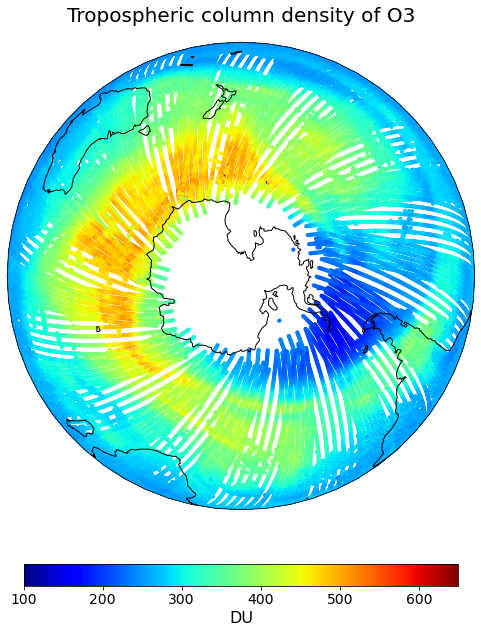

In [57]:
visualize_scatter(xr_dataarray=o3_ab_da_masked,
                 conversion_factor=1,
                 projection=ccrs.Orthographic(180,-90),
                 vmin=100,
                 vmax=650,
                 point_size=10,
                 color_scale='jet',
                 unit=o3_ab_da_masked.units,
                 title=o3_ab_da_masked.long_name)

<br>

## <a id='iasi'></a>IASI total column ozone

#### Load the data with xarray's function `open_dataset`

Load the IASI total column ozone for both, Metop-A and Metop-B satellites.

In [36]:
file_name_2a = '../eodata/iasi/nc/2a/2019/09/IASI_FORLI_O3_metopa_20190910_v20151001.nc'
file_2a = xr.open_dataset(file_name_2a)
file_2a

<xarray.Dataset>
Dimensions:                               (nlayers: 41, nobservations: 173190, npressures: 42)
Dimensions without coordinates: nlayers, nobservations, npressures
Data variables:
    latitude                              (nobservations) float32 ...
    longitude                             (nobservations) float32 ...
    time                                  (nobservations) int32 ...
    sun_zen_angle                         (nobservations) float32 ...
    satellite_zen_angle                   (nobservations) float32 ...
    orbit_number                          (nobservations) int32 ...
    scanline_number                       (nobservations) int32 ...
    pixel_number                          (nobservations) int32 ...
    cloud_cover                           (nobservations) float32 ...
    dofs                                  (nobservations) float32 ...
    retrieval_quality_flag                (nobservations) int32 ...
    surface_altitude                      (nobservations) float32 ...
    tropopause_altitude                   (nobservations) float32 ...
    thermal_contrast                      (nobservations) float32 ...
    ozone_total_column                    (nobservations) float32 ...
    ozone_partial_column_profile          (nobservations, nlayers) float32 ...
    ozone_partial_column_error            (nobservations, nlayers) float32 ...
    ozone_apriori_partial_column_profile  (nobservations, nlayers) float32 ...
    air_partial_column_profile            (nobservations, nlayers) float32 ...
    atmosphere_pressure_grid              (nobservations, npressures) float32 ...
    averaging_kernels_matrix              (nobservations, nlayers, nlayers) float32 ...
Attributes:
    title:                     ESA CCI ozone IASI products (profiles and tota...
    institution:               ULB/LATMOS
    source:                    Eumetsat IASI Level-1C data (version 4 up to 2...
    history:                   2019-10-15 08:36:36 (date of data production) ...
    references:                FORLI (Hurtmans et al (2012): doi:10.1016/j.jq...
    tracking_id:               e653ecb4-ef26-11e9-869d-14feb5c66f1c
    conventions:               CF-1.6
    product_version:           v20151001
    summary:                   This dataset contains Level-2 ozone profile an...
    keywords:                  satellite, observation, atmosphere, ozone
    id:                        IASI_FORLI_O3_metopa_20190910_v20151001.nc
    naming_authority:          ULB/LATMOS
    keywords_vocabulary:       GCMD Science Keywords
    cdm_data_type:             profile, total column
    comment:                   This dataset was produced as part of the Ozone...
    creator_name:              ULB/LATMOS
    creator_email:             juliette.hadji-lazaro@latmos.ipsl.fr
    project:                   Climate Change Initiative - European Space Agency
    geospatial_lat_min:        -90.0
    geospatial_lat_max:        +90.0
    geospatial_lon_min:        -180.0
    geospatial_lon_max:        +180.0
    geospatial_vertical_min:   0
    geospatial_vertical_max:   60000
    time_coverage_start:       20190910T000000Z
    time_coverage_end:         20190910T235959Z
    time_coverage_duration:    P1D
    time_coverage_resolution:  P8S
    standard_name_vocabulary:  NetCDF Climate and Forecast (CF) Metadata Conv...
    license:                   ESA CCI Data Policy: free and open acess
    platform:                  METOP-A
    sensor:                    IASI
    spatial_resolution:        12 km at nadir

In [37]:
file_name_2b_2019 = '../eodata/iasi/nc/2b/2019/09/IASI_FORLI_O3_metopb_20190910_v20151001.nc'
file_2b_2019 = xr.open_dataset(file_name_2b_2019)
file_2b_2019

<xarray.Dataset>
Dimensions:                               (nlayers: 41, nobservations: 279090, npressures: 42)
Dimensions without coordinates: nlayers, nobservations, npressures
Data variables:
    latitude                              (nobservations) float32 ...
    longitude                             (nobservations) float32 ...
    time                                  (nobservations) int32 ...
    sun_zen_angle                         (nobservations) float32 ...
    satellite_zen_angle                   (nobservations) float32 ...
    orbit_number                          (nobservations) int32 ...
    scanline_number                       (nobservations) int32 ...
    pixel_number                          (nobservations) int32 ...
    cloud_cover                           (nobservations) float32 ...
    dofs                                  (nobservations) float32 ...
    retrieval_quality_flag                (nobservations) int32 ...
    surface_altitude                      (nobservations) float32 ...
    tropopause_altitude                   (nobservations) float32 ...
    thermal_contrast                      (nobservations) float32 ...
    ozone_total_column                    (nobservations) float32 ...
    ozone_partial_column_profile          (nobservations, nlayers) float32 ...
    ozone_partial_column_error            (nobservations, nlayers) float32 ...
    ozone_apriori_partial_column_profile  (nobservations, nlayers) float32 ...
    air_partial_column_profile            (nobservations, nlayers) float32 ...
    atmosphere_pressure_grid              (nobservations, npressures) float32 ...
    averaging_kernels_matrix              (nobservations, nlayers, nlayers) float32 ...
Attributes:
    title:                     ESA CCI ozone IASI products (profiles and tota...
    institution:               ULB/LATMOS
    source:                    Eumetsat IASI Level-1C data (version 4 up to 2...
    history:                   2019-10-15 11:42:01 (date of data production) ...
    references:                FORLI (Hurtmans et al (2012): doi:10.1016/j.jq...
    tracking_id:               cd88a4c6-ef40-11e9-b031-14feb5c66f1c
    conventions:               CF-1.6
    product_version:           v20151001
    summary:                   This dataset contains Level-2 ozone profile an...
    keywords:                  satellite, observation, atmosphere, ozone
    id:                        IASI_FORLI_O3_metopb_20190910_v20151001.nc
    naming_authority:          ULB/LATMOS
    keywords_vocabulary:       GCMD Science Keywords
    cdm_data_type:             profile, total column
    comment:                   This dataset was produced as part of the Ozone...
    creator_name:              ULB/LATMOS
    creator_email:             juliette.hadji-lazaro@latmos.ipsl.fr
    project:                   Climate Change Initiative - European Space Agency
    geospatial_lat_min:        -90.0
    geospatial_lat_max:        +90.0
    geospatial_lon_min:        -180.0
    geospatial_lon_max:        +180.0
    geospatial_vertical_min:   0
    geospatial_vertical_max:   60000
    time_coverage_start:       20190910T000000Z
    time_coverage_end:         20190910T235959Z
    time_coverage_duration:    P1D
    time_coverage_resolution:  P8S
    standard_name_vocabulary:  NetCDF Climate and Forecast (CF) Metadata Conv...
    license:                   ESA CCI Data Policy: free and open acess
    platform:                  METOP-B
    sensor:                    IASI
    spatial_resolution:        12 km at nadir

#### Select the variable `ozone_total_column`  and generate a `xarray.DataArray`

In the next step, select the variable of interest `ozone_total_column` from the loaded `xarray.Dataset`. You can continue to generate a xarray with the variable selected and the associated geographic coordinates. You can use the function [generate_xr_from_1D_vec](../functions.ipynb#generate_xr_from_1d_vec) to create a `xarray.DataArray`.

In [44]:
o3_2019_a = file_2a['ozone_total_column']
o3_2019_a

<xarray.DataArray 'ozone_total_column' (nobservations: 173190)>
[173190 values with dtype=float32]
Dimensions without coordinates: nobservations
Attributes:
    units:                                                 mol m-2
    long_name:                                             retrieved ozone to...
    standard_name:                                         atmosphere_mole_co...
    multiplication_factor_to_convert_to_DU:                2241.147
    multiplication_factor_to_convert_to_molecules_percm2:  6.0221417e+19

In [45]:
o3_da_2a = generate_xr_from_1D_vec(file=file_2a, 
                                   lat_path='latitude', 
                                   lon_path='longitude', 
                                   variable=o3_2019_a, 
                                   parameter_name='O3', 
                                   longname=o3_2019_a.long_name, 
                                   no_of_dims=1, 
                                   unit=o3_2019_a.units)
o3_da_2a

<xarray.DataArray 'O3' (ground_pixel: 173190)>
array([0.1472456, 0.1030852, 0.101777 , ..., 0.121807 , 0.127306 ,
       0.1221179], dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 -53.51 -55.94 -56.01 ... 18.81 19.09 18.92
    longitude  (ground_pixel) float32 -26.15 -42.36 -41.06 ... -45.4 -45.37
Dimensions without coordinates: ground_pixel
Attributes:
    long_name:  retrieved ozone total column in mole/m2
    units:      mol m-2

In [46]:
o3_2019_b =file_2b_2019['ozone_total_column']
o3_2019_b

<xarray.DataArray 'ozone_total_column' (nobservations: 279090)>
[279090 values with dtype=float32]
Dimensions without coordinates: nobservations
Attributes:
    units:                                                 mol m-2
    long_name:                                             retrieved ozone to...
    standard_name:                                         atmosphere_mole_co...
    multiplication_factor_to_convert_to_DU:                2241.147
    multiplication_factor_to_convert_to_molecules_percm2:  6.0221417e+19

In [47]:
o3_da_2b = generate_xr_from_1D_vec(file=file_2b_2019,
                                   lat_path='latitude',
                                   lon_path='longitude', 
                                   variable=o3_2019_b, 
                                   parameter_name='O3', 
                                   longname=o3_2019_b.long_name, 
                                   no_of_dims=1, 
                                   unit=o3_2019_b.units)
o3_da_2b

<xarray.DataArray 'O3' (ground_pixel: 279090)>
array([0.1289723, 0.1268423, 0.1265471, ..., 0.1473683, 0.141187 ,
       0.1421669], dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 36.34 36.5 36.46 36.3 ... 70.35 70.14 69.5
    longitude  (ground_pixel) float32 -41.4 -41.45 -41.66 ... 147.9 147.8 150.6
Dimensions without coordinates: ground_pixel
Attributes:
    long_name:  retrieved ozone total column in mole/m2
    units:      mol m-2

#### Concatenate the two data array based on the dimension `ground_pixel`

In [48]:
o3_da_2ab = xr.concat([o3_da_2a, o3_da_2b], dim='ground_pixel')
o3_da_2ab

<xarray.DataArray 'O3' (ground_pixel: 452280)>
array([0.1472456, 0.1030852, 0.101777 , ..., 0.1473683, 0.141187 ,
       0.1421669], dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 -53.51 -55.94 -56.01 ... 70.35 70.14 69.5
    longitude  (ground_pixel) float32 -26.15 -42.36 -41.06 ... 147.9 147.8 150.6
Dimensions without coordinates: ground_pixel
Attributes:
    long_name:  retrieved ozone total column in mole/m2
    units:      mol m-2

#### Convert from molecules per metre square to Dobson Unit by applying a multiplication factor

The unit of the data is `molecules per metre square`. Ozone is often expressed in `Dobson Unit`. `Molecules per metre square` can be converted to `Dobson Unit [DU]` by multiplying the values with 2241.147. The multiplication factor is provided as attribute of the the `ozone_total_column` data parameter `xarray.DataArray`.

In [49]:
du_multiplication_factor = o3_2019_a.multiplication_factor_to_convert_to_DU
du_multiplication_factor

2241.147

In [54]:
o3_da_2ab_du = o3_da_2ab * du_multiplication_factor
o3_da_2ab_du

<xarray.DataArray 'O3' (ground_pixel: 452280)>
array([329.99902, 231.02908, 228.09721, ..., 330.27402, 316.4208 ,
       318.6169 ], dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 -53.51 -55.94 -56.01 ... 70.35 70.14 69.5
    longitude  (ground_pixel) float32 -26.15 -42.36 -41.06 ... 147.9 147.8 150.6
Dimensions without coordinates: ground_pixel

#### Flag elevated values

Ozone values higher than 500 DU can be flagged out with xarray's function `where`.

In [60]:
o3_da_2ab_du_flagged = xr.where(o3_da_2ab_du > 500, np.nan, o3_da_2ab_du)
o3_da_2ab_du_flagged

<xarray.DataArray 'O3' (ground_pixel: 452280)>
array([329.99902, 231.02908, 228.09721, ..., 330.27402, 316.4208 ,
       318.6169 ], dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 -53.51 -55.94 -56.01 ... 70.35 70.14 69.5
    longitude  (ground_pixel) float32 -26.15 -42.36 -41.06 ... 147.9 147.8 150.6
Dimensions without coordinates: ground_pixel

#### Visualize the data array in an `Orthographic()` projection with the function `visualize_scatter`

The final step is to visualize the flagged data with the function [visualize_scatter](../functions.ipynb#visualize_scatter).

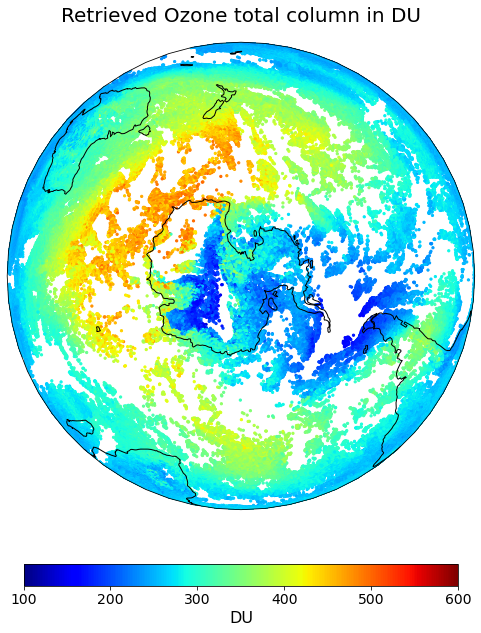

In [61]:
visualize_scatter(xr_dataarray=o3_da_2ab_du_flagged, 
                  conversion_factor=1, 
                  projection=ccrs.Orthographic(180,-90),
                  vmin=100,
                  vmax=600, 
                  point_size=5,
                  color_scale='jet',
                  unit='DU',
                  title='Retrieved Ozone total column in DU')

<br>

## <a id='cams_nrt'></a>CAMS Global Near-Real-Time Forecast -  Total Column Ozone

#### Load the CAMS Global Near-Real-Time forecast data with xarray's function `open_dataset`

Load the dataset with xarry's function `xr.open_dataset`. You see that the data is a three-dimensional dataset, with `latitude`, `longitude` and `time` as dimensions. The data variables is called `gtco2`.

In [63]:
cams_fc = '../eodata/cams/nrt/o3/2019/09/10/20190910_o3_fc.nc'
cams_fc_xr = xr.open_dataset(cams_fc)
cams_fc_xr

<xarray.Dataset>
Dimensions:    (latitude: 451, longitude: 900, time: 6)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.6 -179.2 ... 178.8 179.2 179.6
  * latitude   (latitude) float32 90.0 89.6 89.2 88.8 ... -89.2 -89.6 -90.0
  * time       (time) datetime64[ns] 2019-09-10 2019-09-11 ... 2019-09-15
Data variables:
    gtco3      (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2019-12-08 10:15:35 GMT by grib_to_netcdf-2.14.1: grib_to_n...

#### Select the variable `gtco3` from the dataset

The next step is to load the data variable as `xarray.DataArray`. The data is the `Total Column Ozone` data in `kg m**-2`.

In [64]:
cams_o3 = cams_fc_xr['gtco3']
cams_o3

<xarray.DataArray 'gtco3' (time: 6, latitude: 451, longitude: 900)>
[2435400 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.6 -179.2 ... 178.8 179.2 179.6
  * latitude   (latitude) float32 90.0 89.6 89.2 88.8 ... -89.2 -89.6 -90.0
  * time       (time) datetime64[ns] 2019-09-10 2019-09-11 ... 2019-09-15
Attributes:
    units:      kg m**-2
    long_name:  GEMS Total column ozone

#### Convert the data values from `kg m**-2` to `Dobson Unit`

The next step is to convert the data from kg m**-2 to the commonly used unite for Ozone, `Dobson Unit`. You can do so by dividing the data values witht the factor `2.1415*1e-5`.

In [65]:
cams_o3_du = cams_o3 / (2.1415*1e-5)
cams_o3_du

<xarray.DataArray 'gtco3' (time: 6, latitude: 451, longitude: 900)>
array([[[282.82578, 282.82578, 282.82578, ..., 282.82578, 282.82578,
         282.82578],
        [283.98798, 283.99817, 284.00833, ..., 283.95737, 283.96756,
         283.97778],
        [285.59875, 285.6191 , 285.63953, ..., 285.53247, 285.55286,
         285.57834],
        ...,
        [233.81432, 233.8296 , 233.8449 , ..., 233.76845, 233.78372,
         233.79901],
        [232.94267, 232.94775, 232.95795, ..., 232.91718, 232.92227,
         232.93246],
        [230.96997, 230.96997, 230.96997, ..., 230.96997, 230.96997,
         230.96997]],

       [[283.4986 , 283.4986 , 283.4986 , ..., 283.4986 , 283.4986 ,
         283.4986 ],
        [286.2665 , 286.2818 , 286.292  , ..., 286.2359 , 286.2461 ,
         286.25632],
        [289.0191 , 289.0395 , 289.05988, ..., 288.95285, 288.9732 ,
         288.9987 ],
...
        [257.37958, 257.38977, 257.39487, ..., 257.3541 , 257.3643 ,
         257.36935],
        [255.59549, 255.60057, 255.60057, ..., 255.58017, 255.58528,
         255.5904 ],
        [253.86237, 253.86237, 253.86237, ..., 253.86237, 253.86237,
         253.86237]],

       [[269.94974, 269.94974, 269.94974, ..., 269.94974, 269.94974,
         269.94974],
        [271.09668, 271.09668, 271.10175, ..., 271.09155, 271.09155,
         271.09668],
        [273.25287, 273.25797, 273.25797, ..., 273.24268, 273.24774,
         273.24774],
        ...,
        [252.48097, 252.46059, 252.4453 , ..., 252.52684, 252.51155,
         252.49626],
        [251.17093, 251.16075, 251.15564, ..., 251.19644, 251.18623,
         251.18115],
        [250.95685, 250.95685, 250.95685, ..., 250.95685, 250.95685,
         250.95685]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.6 -179.2 ... 178.8 179.2 179.6
  * latitude   (latitude) float32 90.0 89.6 89.2 88.8 ... -89.2 -89.6 -90.0
  * time       (time) datetime64[ns] 2019-09-10 2019-09-11 ... 2019-09-15

#### Visualize one time step with `visualize_pcolormesh`

The last step is to visualize on specific data of the Total Column Ozone forecast with the function [visualize_pcolormesh](../functions.ipynb#visualize_pcolormesh).

(<Figure size 1440x720 with 2 Axes>,
 <GeoAxesSubplot:title={'center':'GEMS Total column ozone 2019-09-10T00:00:00.000000000'}>)

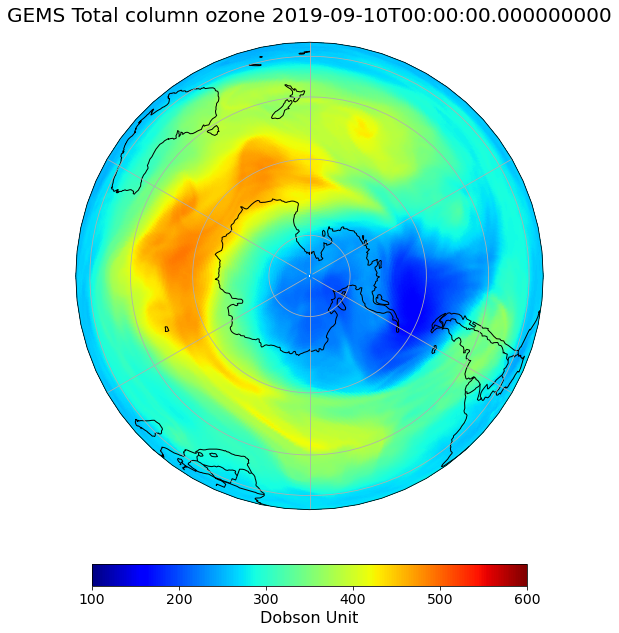

In [66]:
day = 0
visualize_pcolormesh(data_array=cams_o3_du[day,:,:],
                     longitude=cams_o3_du.longitude, 
                     latitude=cams_o3_du.latitude, 
                     projection=ccrs.Orthographic(180,-90.),
                     color_scale='jet',
                     unit='Dobson Unit', 
                     long_name=cams_o3.long_name + ' '+ str(cams_o3_du.time[day].data),
                     vmin=100,
                     vmax=600)


See [here](./342_Ozone_hole_anomaly_2019_case_study_cams_animation.ipynb) the CAMS Total column ozone forecast animated over five days.

<br>

<a href="../00_index.ipynb"><< Index</a><br>
<a href="./333_Sentinel-3_SLSTR_NRT_AOD_Californian_fires_case_study.ipynb"><< 333 - Case study - Sentinel-3 SLSTR NRT AOD - Californian fires</a><span style="float:right;"><a href="./342_Ozone_hole_anomaly_2019_case_study_cams_animation.ipynb">342 - Case study - Ozone hole anomaly 2019 - CAMS animation >></a></span>

<hr>

<p><img src='../img/copernicus_logo.png' align='left' alt='Logo EU Copernicus' width='25%'></img></p>
<br clear=left>
<p style="text-align:left;">This project is licensed under the <a href="../LICENSE">MIT License</a> <span style="float:right;"><a href="https://gitlab.eumetsat.int/eumetlab/atmosphere/atmosphere">View on GitLab</a> | <a href="https://training.eumetsat.int/">EUMETSAT Training</a>